In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [31]:
x_train = np.load("./Xtrain_Classification_Part1.npy")
y_train = np.load("./Ytrain_Classification_Part1.npy")
x_test = np.load("./Xtest_Classification_Part1.npy")


In [32]:
x_train = x_train/255
x_test = x_test/255

In [33]:
x_train_reshaped = x_train.reshape((x_train.shape[0],50,50))
x_test_reshaped = x_test.reshape((x_test.shape[0],50,50))

In [34]:
##x_train_1,x_train_2 = x_train_reshaped[:6000],x_train_reshaped[6000:]
##y_train_1,y_train_2 = y_train[:6000],y_train[6000:]


In [35]:
n_classes = 2

In [36]:
##print("Shape before one-hot encoding: ", y_train_1.shape)
#y_train_1 = np_utils.to_categorical(y_train_1, n_classes)
#y_train_2 = np_utils.to_categorical(y_train_2, n_classes)
#print("Shape after one-hot encoding: ", y_train_1.shape)

In [37]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(50, 50)),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])

# compiling the sequential model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',#sparse_categorical_crossentropy
              metrics=['accuracy'])
# training the model for 10 epochs


In [38]:
history = model.fit(x_train_reshaped, y_train, epochs=20,  validation_split=0.1, shuffle=True)


Epoch 1/20
184/184 [==============================] - 5s 26ms/step - loss: 0.7163 - accuracy: 0.6533 - val_loss: 0.5937 - val_accuracy: 0.6825
Epoch 2/20
184/184 [==============================] - 4s 20ms/step - loss: 0.5482 - accuracy: 0.7197 - val_loss: 0.4919 - val_accuracy: 0.7745
Epoch 3/20
184/184 [==============================] - 4s 22ms/step - loss: 0.5188 - accuracy: 0.7391 - val_loss: 0.4528 - val_accuracy: 0.7991
Epoch 4/20
184/184 [==============================] - 4s 22ms/step - loss: 0.4603 - accuracy: 0.7816 - val_loss: 0.4320 - val_accuracy: 0.8021
Epoch 5/20
184/184 [==============================] - 4s 21ms/step - loss: 0.4835 - accuracy: 0.7654 - val_loss: 0.4282 - val_accuracy: 0.8129
Epoch 6/20
184/184 [==============================] - 4s 21ms/step - loss: 0.4511 - accuracy: 0.7867 - val_loss: 0.4283 - val_accuracy: 0.7991
Epoch 7/20
184/184 [==============================] - 4s 21ms/step - loss: 0.4470 - accuracy: 0.7884 - val_loss: 0.4505 - val_accuracy: 0.7807

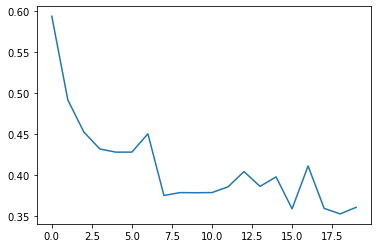

In [42]:
plt.plot(history.history["val_loss"])

In [40]:
#y_test = model.predict(x_test_reshaped)

In [41]:
for i in range(y_test.shape[0]):
    if np.argmax(y_test[i])==0:
        print("male")
    else:
        print("female")
    plt.imshow(x_test_reshaped[i])#,cmap="Greys"
    plt.show()
    time.sleep( 5 )

NameError: name 'y_test' is not defined